# Análisis de conglomerados


#### Análisis jerárquico
#### Autor:
#### Fecha:

# Cargar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo

In [2]:
data = pd.read_csv("customers.csv")

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Mostrar el encabezado de los datos - head()


In [4]:
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


# Mostrar los últimos registros de los datos - tail()


In [5]:
data.tail(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Mostrar el tamaño del dataset -  shape


In [6]:
data.shape

(200, 5)

# Mostrar la información de cada variable - info()


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Mostrar la información estadística de cada variable - describe()


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Graficar la distribución de cada variable

In [9]:
columns_names = list(data.columns)
columns_names

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

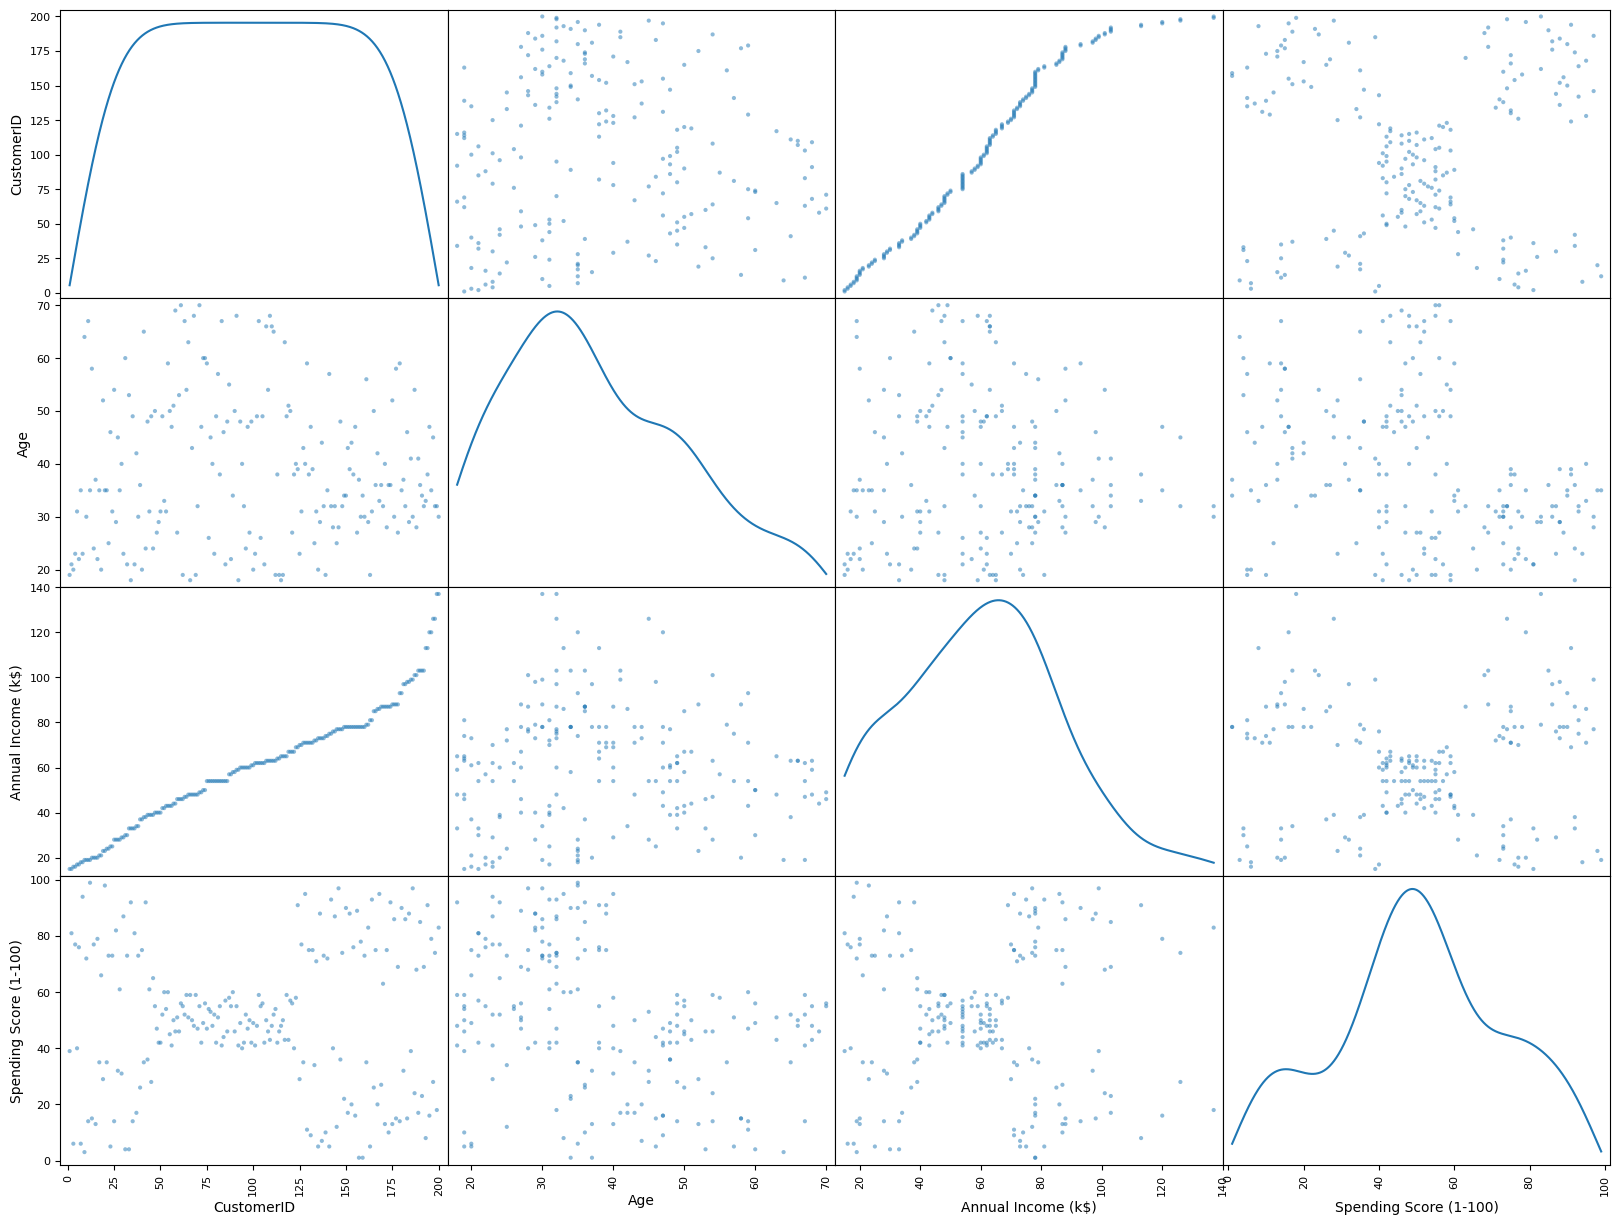

In [10]:
pd.plotting.scatter_matrix(data.loc[:,columns_names], diagonal="kde",figsize=(20,15))
plt.show()

# Seleccionar las variables para agrupar

In [11]:
X = data.iloc[:, [3, 4]].values

In [12]:
X[0:3]

array([[15, 39],
       [15, 81],
       [16,  6]])

# Crear dendograma con las variables seleccionadas

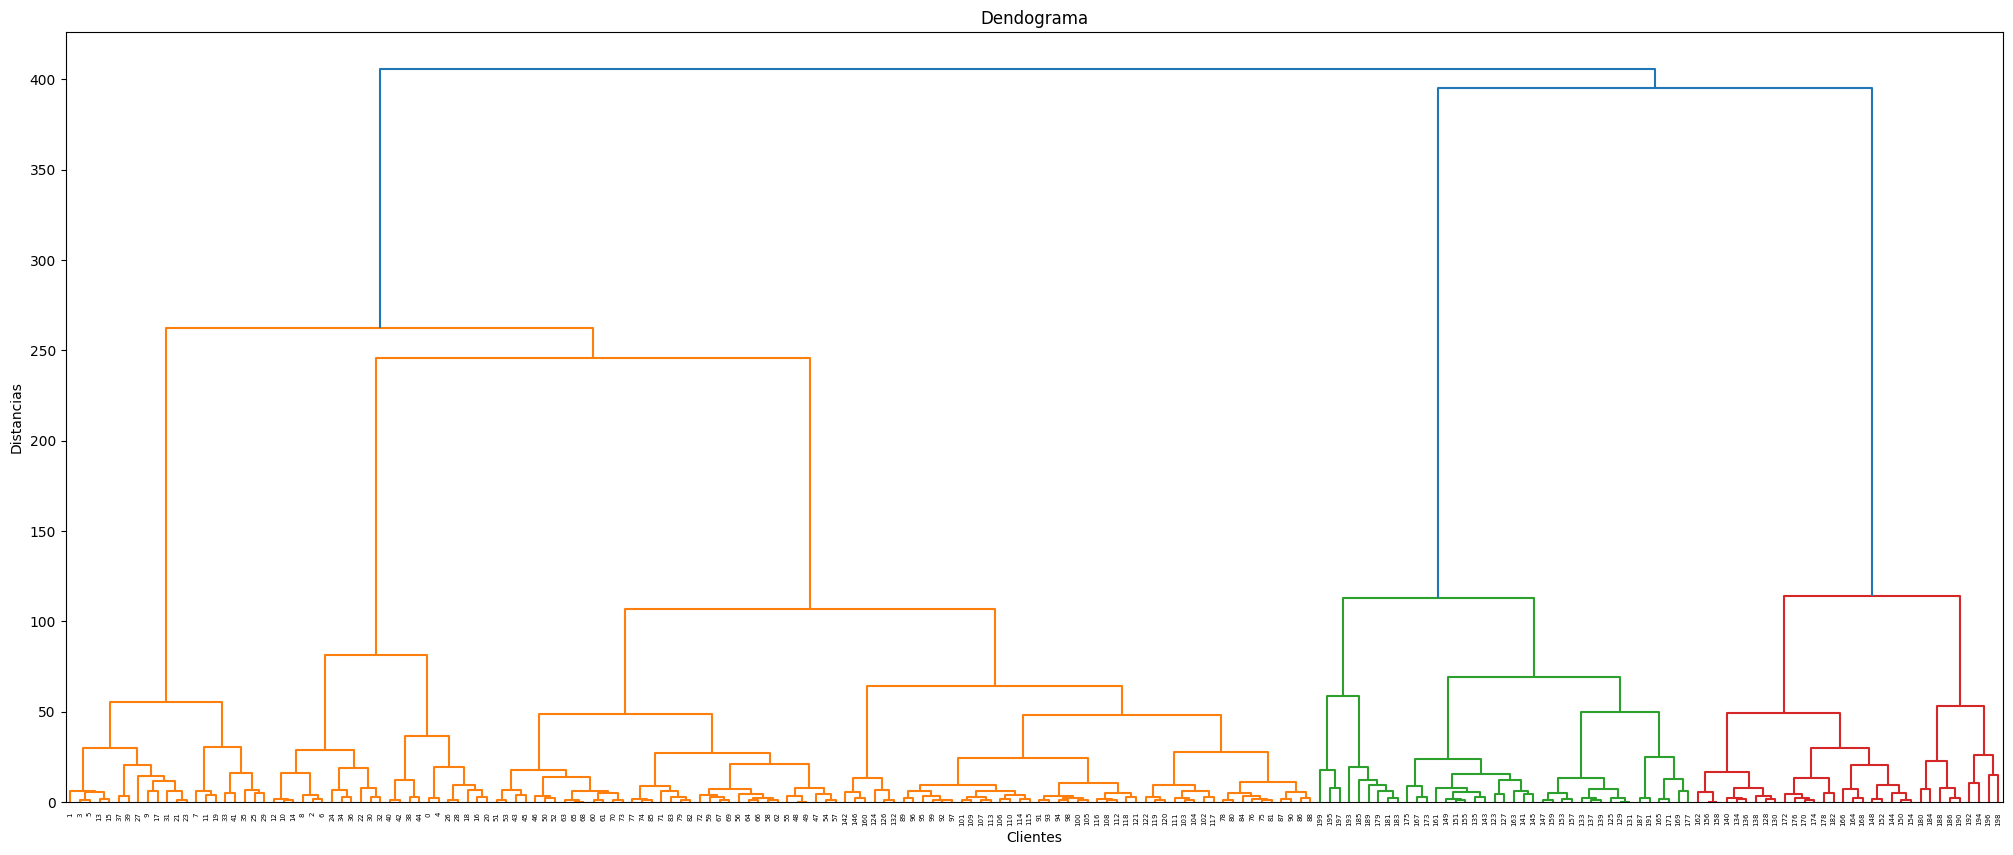

In [13]:
import scipy.cluster.hierarchy as sch
fig = plt.figure(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('Distancias')
plt.show()

# Seleccionar el número de clusters y generar los **grupos** para cada cliente

In [18]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Mostrar

# Graficar los grupos

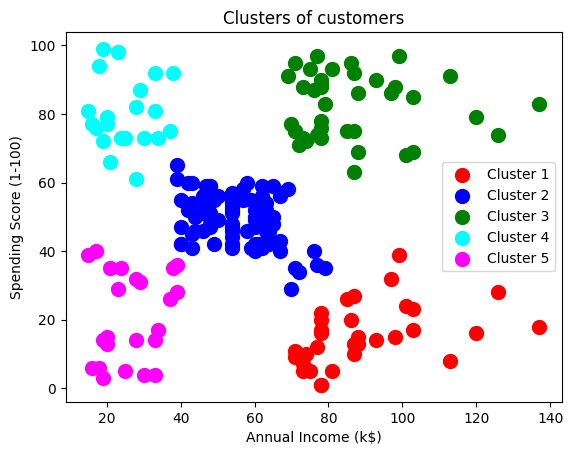

In [20]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Emitir conclusiones:

En caso de buscar los mejores clientes qué grupo seleccionaría y porqué?